In [1]:
#Assignment -2 , Script to analyse the data based on income, sex, marital status, number of children 

%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.figure as fig
import numpy as np
#import ggplot as gg
import matplotlib
#from ggplot import *
from seaborn import *
from numpy import median

In [2]:
#fetching columns we interested in
columns = ['ST','ESR', 'FER', 'JWTR','MAR', 'SSP', 'FOD1P', 'INDP','MSP','PAOC','PERNP','PINCP','RAC3P', 'OCCP', 'AGEP', 'SEX', 'WAGP', 'FOD1P', 'SCHL']

#url1 = "https://s3-ap-southeast-1.amazonaws.com/cloudandbigdataassignment2/ss13pusa.csv"
#url2 =  "https://s3-ap-southeast-1.amazonaws.com/cloudandbigdataassignment2/ss13pusb.csv"

url1 = "https://s3-ap-southeast-1.amazonaws.com/assignmentbigdata/subsetFile_big1.csv"
url2 = "https://s3-ap-southeast-1.amazonaws.com/assignmentbigdata/subsetFile_big2.csv"

In [3]:
p1 = pd.read_csv(url1, usecols=columns )

In [4]:
p2 =  pd.read_csv(url2, usecols=columns )

In [5]:
#append both the files
p = p1.append(p2)

In [6]:
edu = p[(p["SCHL"].isin([15,16,17,18,19,20,21,22,23,24]))]

In [7]:
sex = { 1 : "Male",
        2 : "Female"
      }
employement_status = { 1 : "Employed",
                       3 : "Unemployed"
                     }
                     

In [8]:
#Employed and Unemployed 
emp = p[(p["ESR"].isin([1,3]))]
#Employment Status
emp["SEX"] = emp["SEX"].apply(lambda x: sex[x])
emp["ESR"] = emp["ESR"].apply(lambda x: employement_status[x])

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


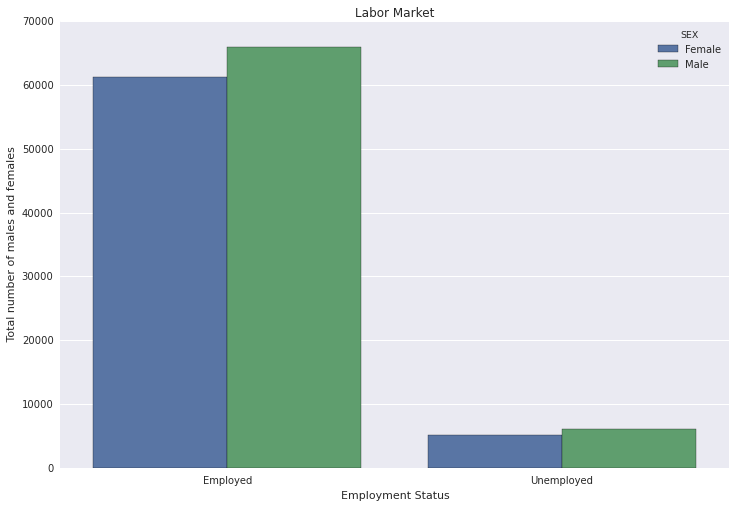

In [9]:
#how many are employed / unemployed
plt.figure(figsize=(12,8))
ax = sns.countplot(x= "ESR",hue="SEX", data=emp)
plt.title('Labor Market')
plt.xlabel('Employment Status')
plt.ylabel(' Total number of males and females')

In [10]:
#Average income for all employed people
emp_sal = p[(p["ESR"].isin([1]))]
emp_sal["SEX"] = emp_sal["SEX"].apply(lambda x: sex[x])
emp_sal["ESR"] = emp_sal["ESR"].apply(lambda x: employement_status[x])

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


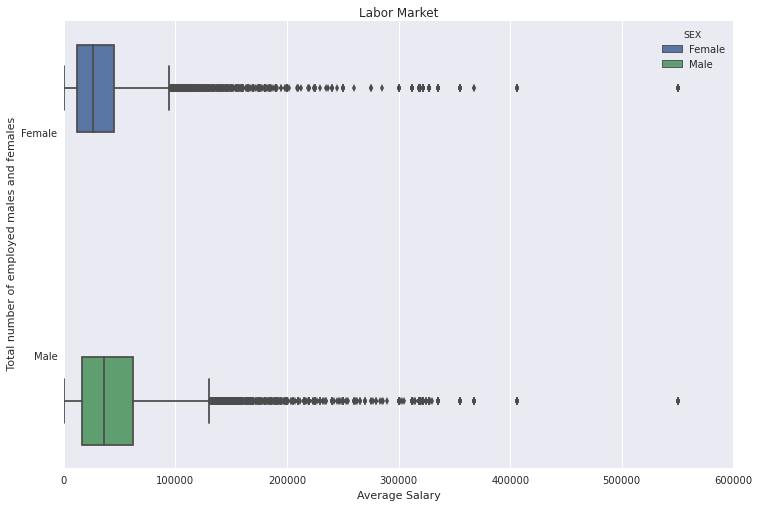

In [11]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x= "WAGP",y = "SEX", hue="SEX", data=emp_sal)
plt.title('Labor Market')
plt.xlabel('Average Salary')
plt.ylabel(' Total number of employed males and females')

In [12]:
#Education 
education = {                  
           15 : "12th grade - no diploma"  ,
           16 : "Regular high school diploma",
           17 : "GED or alternative credential",
           18 : "Some college, but less than 1 year",
           19 : "1 or more years of college credit, no degree",
           20 : "Associate's degree",                           
           21 : "Bachelor's degree",
           22 : "Master's degree",
           23 : "Professional degree beyond a bachelor's degree",
           24 : "Doctorate degree"
             }


In [13]:
#Education Details                   
edu["SEX"] = edu["SEX"].apply(lambda x: sex[x])
edu["SCHL"] = edu["SCHL"].apply(lambda x: education[x])

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


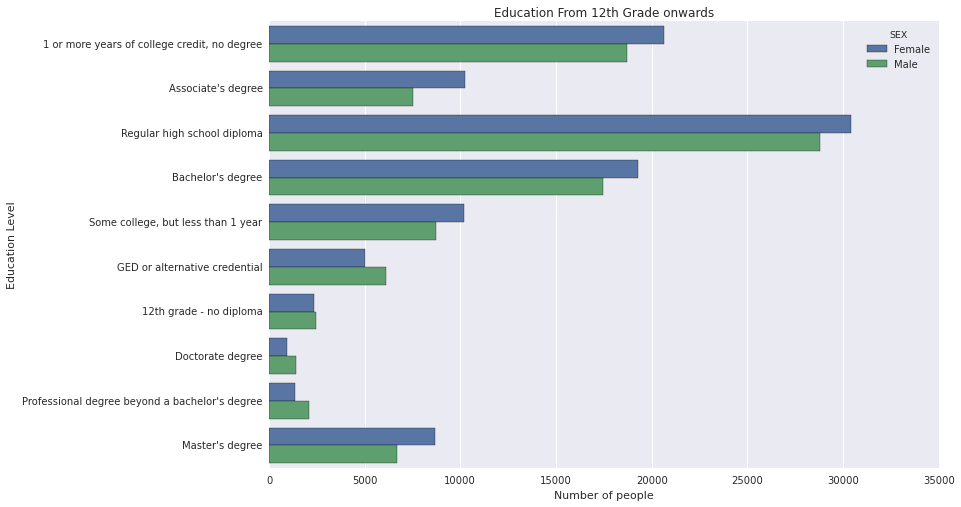

In [14]:
#education 
plt.figure(figsize=(12,8))
ax = sns.countplot(y= "SCHL",hue="SEX", data=edu)
plt.title('Education From 12th Grade onwards')
plt.xlabel('Number of people')
plt.ylabel('Education Level')

In [16]:
#Industry Level  
agriculture = {  170 : "AGR"     ,
           180 : "AGR",
           190 : "AGR" ,
           270 : "AGR" ,
           280 : "AGR",
           290 : "AGR",
           370 : "EXT" ,
           380 : "EXT", 
           390 : "EXT", 
           470 : "EXT" ,
           490 : "EXT" ,
           570 : "UTL" ,
             580  : "UTL", 
           590  : "UTL", 
           670  : "UTL" ,
           680  : "UTL", 
           690  : "UTL", 
           770 : "CON" ,
           1070 :"MFG" ,
           1080  :"MFG",
           1090  :"MFG" ,
           1170  :"MFG" ,
           1180  :"MFG",
           1190 :"MFG" ,
           1270  :"MFG",
           1280 :"MFG"  ,
           1290  :"MFG"  ,
           1370  :"MFG" ,
           1390  :"MFG" ,
           1470  :"MFG",
           1480  :"MFG",
           1490  :"MFG" ,
           1570  :"MFG" ,
           1590  :"MFG" ,
           1670  :"MFG" ,
           1680  :"MFG" ,
           1690  :"MFG" ,
           1770  :"MFG" ,
           1790  :"MFG" ,
                
           1870  :"MFG"  ,
           1880  :"MFG"  ,
           1890  :"MFG"  ,
           1990  :"MFG" ,
           2070  :"MFG",
           2090  :"MFG"    ,
           2170  :"MFG"  ,
           2180 :"MFG" ,
           2190  :"MFG",
           2270  :"MFG"   ,
           2280  :"MFG" ,
           2290  :"MFG" ,
           2370  :"MFG",
           2380  :"MFG",
           2390  :"MFG"  ,
           2470   :"MFG" ,
           2480 :"MFG" ,
           2490  :"MFG"  ,
           2570  :"MFG"  ,
           2590  :"MFG"  ,
           2670  :"MFG" ,
           2680  :"MFG" ,
          2770 :"MFG",
           2780 :"MFG",
           2790 :"MFG",
           2870 :"MFG",
           2880 :"MFG",
           2890 :"MFG",
           2970 :"MFG",
           2980 :"MFG",
           2990 :"MFG",
           3070 :"MFG",
           3080 :"MFG",
           3095 :"MFG",
           3170 :"MFG",
           3180 :"MFG",
           3190 :"MFG",
           3365 :"MFG",
           3370 :"MFG",
           3380 :"MFG",
           3390 :"MFG",
           3470 :"MFG",
           3490 :"MFG",
           3570 :"MFG",
           3580 :"MFG",
           3590 :"MFG",
           3670 :"MFG",
           3680 :"MFG",
           3690 :"MFG",
           3770 :"MFG",
           3780 :"MFG",
           3790 :"MFG",
           3875 :"MFG",
           3895 :"MFG",
           3960 :"MFG",
           3970 :"MFG",
           3980  :"MFG",
           3990  :"MFG" ,
           4070 : "WHL",
           4080  : "WHL",
           4090  : "WHL",
           4170 : "WHL",
           4180  : "WHL",
           4195  : "WHL",   
           4265  : "WHL",
           4270  : "WHL",
           4280 : "WHL",
           4290  : "WHL",
           4370  : "WHL",
           4380  : "WHL",
           4390  : "WHL",
           4470  : "WHL",
           4480  : "WHL",
           4490  : "WHL",
           4560  : "WHL",
           4570  : "WHL",
           4580  : "WHL",
           4585  : "WHL",
           4590  : "WHL",
           4670 : "RET",
           4680 : "RET", 
           4690 : "RET", 
           4770 : "RET", 
           4780 : "RET", 
           4795 : "RET", 
           4870 : "RET", 
           4880 : "RET", 
           4890 : "RET", 
           4970 : "RET", 
           4980 : "RET", 
           4990 : "RET", 
           5070 : "RET", 
           5080 : "RET", 
           5090 : "RET", 
           5170 : "RET", 
           5180 : "RET", 
           5190 : "RET", 
           5275 : "RET", 
           5280 : "RET", 
           5295 : "RET", 
           5370 : "RET", 
           5380 : "RET", 
           5390 : "RET", 
           5470 : "RET", 
           5480 : "RET", 
           5490 : "RET", 
           5570 : "RET", 
           5580 : "RET", 
           5590 : "RET", 
           5591 : "RET", 
           5592 : "RET", 
           5670 : "RET", 
           5680 : "RET", 
           5690 : "RET", 
           5790 : "RET", 
           6070 :"TRN",
           6080 :"TRN",
           6090 :"TRN",
           6170 :"TRN",
           6180 :"TRN",
           6190 :"TRN",
           6270 :"TRN",
           6280 :"TRN",
           6290 :"TRN",
           6370 :"TRN",
           6380:"TRN",
           6390 :"TRN",
           6470 :"INF" ,
           6480  :"INF" ,
           6490  :"INF"  ,
           6570  :"INF"   ,
           6590  :"INF",
           6670  :"INF",
           6672  :"INF",
           6680  :"INF",
           6690  :"INF",
           6695  :"INF",
           6770  :"INF",
           6780  :"INF",
           6870  : "FIN",
           6880 : "FIN",
           6890 : "FIN",
           6970 : "FIN",
           6990 : "FIN",
           7070 : "FIN",
           7080 : "FIN",
           7170 : "FIN",
           7180 : "FIN",
           7190 : "FIN",
           7270 : "PRF",
           7280 : "PRF",
           7290 : "PRF",
           7370 : "PRF",
           7380  : "PRF",
           7390  : "PRF",
           7460  : "PRF",
           7470  : "PRF",
           7480 : "PRF",
           7490 : "PRF",
           7570  : "PRF",
           7580  : "PRF",
           7590  : "PRF",
           7670  : "PRF",
           7680  : "PRF",
           7690  : "PRF",
           7780  : "PRF",
           7790 : "PRF",
           7860 : "EDU",
           7870 :"EDU",
           7880 : "EDU",
           7890: "EDU",
           7970 : "MED", 
           7980 : "MED", 
           7990  : "MED", 
           8070 : "MED",
           8080 : "MED",
           8090 : "MED",
           8170 : "MED",
           8180 : "MED",
           8190 : "MED",
           8270 : "MED",
           8290 : "MED"
           }




In [17]:
ind = p[(p["ESR"].isin([1,3]) & p["INDP"].isin(agriculture))]
ind["SEX"] = ind["SEX"].apply(lambda x: sex[x])
ind["INDP"] = ind["INDP"].apply(lambda x: agriculture[x])

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


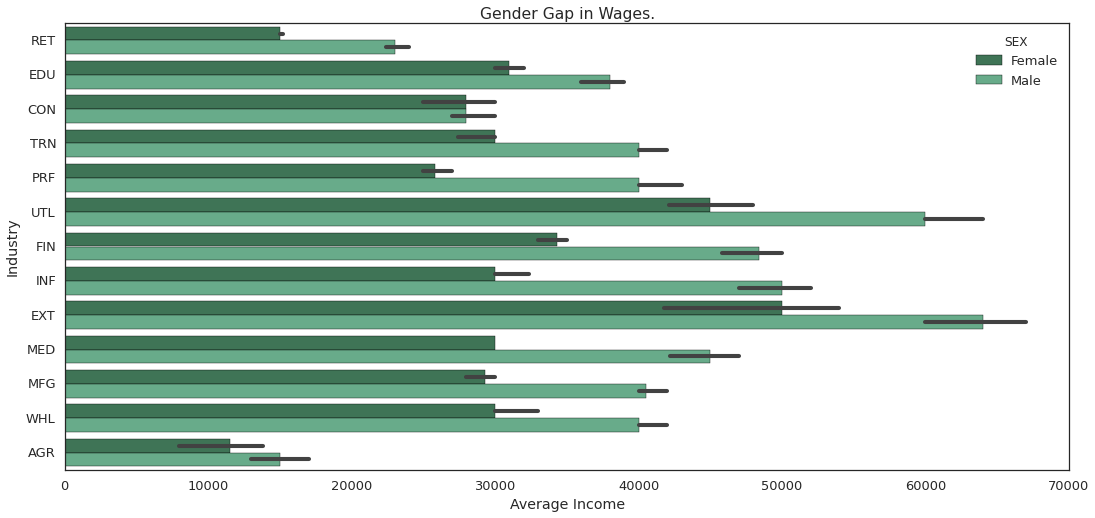

In [19]:
# Industry 
plt.figure(figsize=(18, 8))
sns.set(style="white", context="talk")
sns.barplot(x = "WAGP", y= "INDP",hue="SEX", data=ind,  estimator=median, palette="BuGn_d")
sns.plt.title('Gender Gap in Wages.')
sns.plt.xlabel('Average Income')
sns.plt.ylabel('Industry')
plt.savefig("IndutryWise.png")  

In [20]:
#MArital Status
Marital = {
           1 : "Married"   ,
           2 : "Widowed",
           3 : "Divorced"   ,
           4 : "Seperated"  ,
           5 : "Never married" 
           }


In [21]:
sex = { 1 : "Male",
        2 : "Female"
      }

In [26]:
# aVERAGE WAGE VS MARITAL STATUS FOR BOTH MEN AND WOMEN      
mar = p[(p["ESR"].isin([1]))]
mar["SEX"] = mar["SEX"].apply(lambda x: sex[x])
mar["MAR"] = mar["MAR"].apply(lambda x: Marital[x])

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


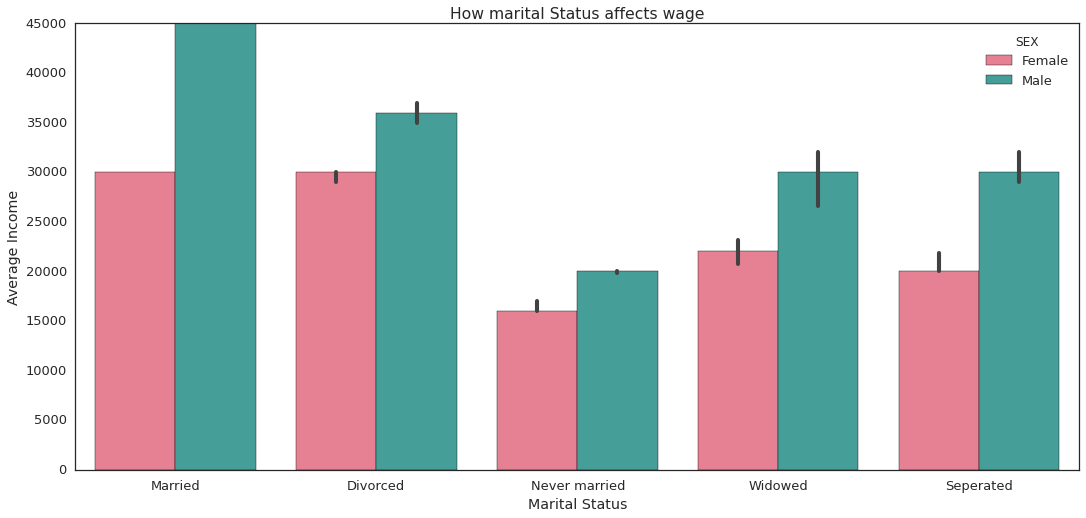

In [27]:
# MArital Status 
plt.figure(figsize=(18, 8))
#sns.set(style="white", context="talk")
sns.barplot(y = "WAGP", x= "MAR",hue="SEX", data=mar,  estimator=median, palette="husl")
sns.plt.title('How marital Status affects wage')
sns.plt.xlabel('Marital Status')
sns.plt.ylabel('Average Income')
plt.savefig("MaritalStatus.png")   

In [28]:
#Select only employed ppl and females
marFemale = p[(p["ESR"].isin([1])) & (p["SEX"].isin([2]))]

In [29]:
#Set the gender and marriage codes
marFemale["MAR"] = marFemale["MAR"].apply(lambda x: Marital[x])
marFemale["SEX"] = marFemale["SEX"].apply(lambda x: sex[x])

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


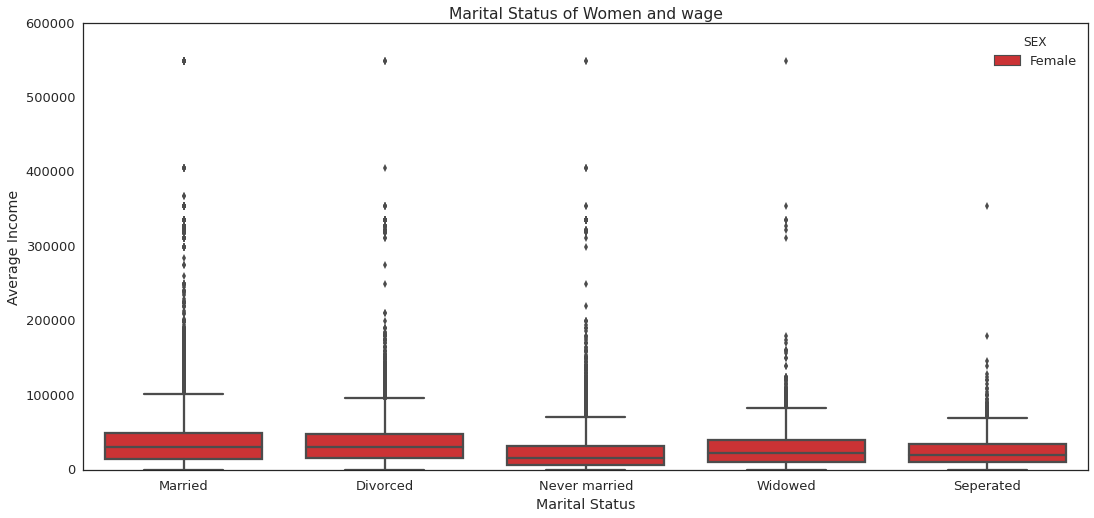

In [32]:
#marital status of women and average wage
#Plot the graph
# MArital Status 
plt.figure(figsize=(18, 8))
sns.set(style="white", context="talk")
sns.boxplot(y = "WAGP", x= "MAR",hue="SEX", data=marFemale,  palette="Set1")
sns.plt.title('Marital Status of Women and wage')
sns.plt.xlabel('Marital Status')
sns.plt.ylabel('Average Income')
plt.savefig("MaritalStatus.png") 

In [33]:
#Number of children and averages wages
Children = {
           1 : "Children under 6 years only",
           2 : "Children 6 to 17 years only",
           3 : "Children under 6 years and 6 to 17 years",
           4 : "No children"
           }

In [34]:
#Select only employed females and age more than 20
WithChild = p[(p["ESR"].isin([1])) & (p["SEX"].isin([2])) &  (p["PAOC"].isin(Children)) & (p["AGEP"] >= 20)]

In [35]:
WithChild["SEX"] = WithChild["SEX"].apply(lambda x: sex[x])
#WithChild["ESR"] = WithChild["ESR"].apply(lambda x: employement_status[x])
WithChild["PAOC"] = WithChild["PAOC"].apply(lambda x: Children[x])

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


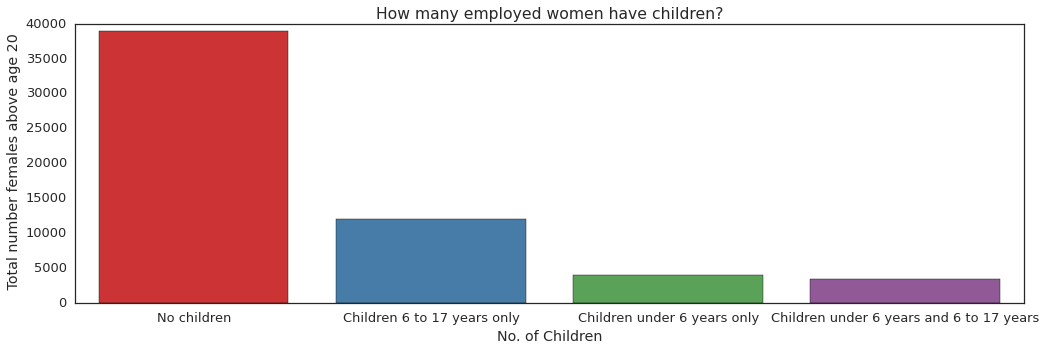

In [36]:
#Count of females with children / no children
plt.figure(figsize=(17,5))
ax = sns.countplot(x= "PAOC", data=WithChild, palette="Set1")
plt.title('How many employed women have children?')
plt.xlabel('No. of Children')
plt.ylabel(' Total number females above age 20')   

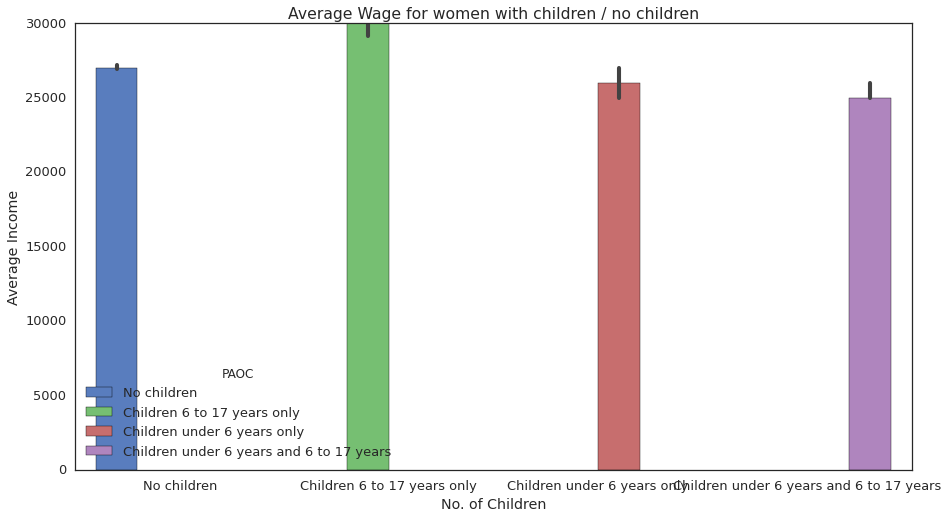

In [38]:
#Average Wage of females with children/ no children
#Plot the graph
plt.figure(figsize=(15, 8))
sns.set(style="white", context="talk")
sns.barplot(y = "WAGP", x= "PAOC",hue="PAOC", data=WithChild,  estimator=median, palette="muted")
sns.plt.title('Average Wage for women with children / no children')
sns.plt.xlabel('No. of Children')
sns.plt.ylabel('Average Income')
plt.savefig("ChildrenWages.png")  

In [39]:
#MArital status and children

Mar_Status = p[(p["ESR"].isin([1])) & (p["SEX"].isin([2])) &    (p["PAOC"].isin(Children)) &    (p["MAR"].isin(Marital)) ]
Mar_Status["MAR"] = Mar_Status["MAR"].apply(lambda x: Marital[x])
Mar_Status["PAOC"] = Mar_Status["PAOC"].apply(lambda x: Children[x])

/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


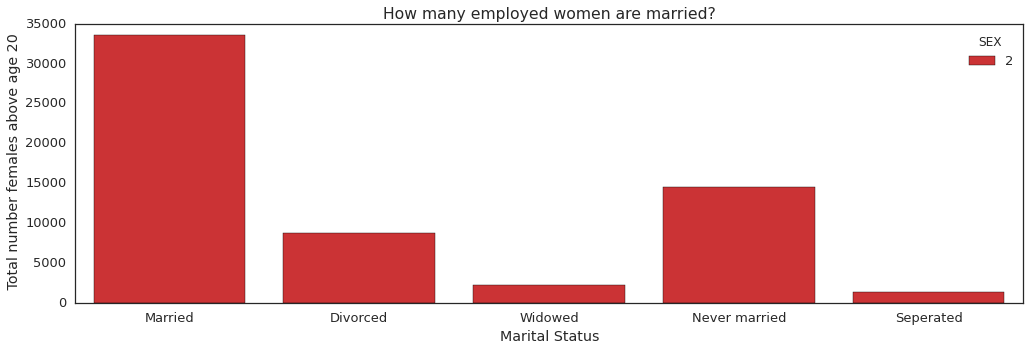

In [40]:
#Count of females with different marital status 
plt.figure(figsize=(17,5))
ax = sns.countplot(x= "MAR",hue="SEX", data=Mar_Status, palette="Set1")
plt.title('How many employed women are married?')
plt.xlabel('Marital Status')
plt.ylabel(' Total number females above age 20')  